Zostanie pokazane, jak można wdrożyć optymalizację symulowanego wyżarzania. 

Najpierw musimy zdefiniować naszą funkcję celu i granice kazdej zmiennej wejściowej do funkcji celu. 

Funkcja celu to tylko funkcja Pythona, którą będziemy nazywali  `objective()`. Granice będą tablicą 2D z jednym wymiarem dla każdej zmiennej wejściowej, który definiuje minimum i maksimum dla zmiennej. 

Na przykład jednowymiarowa funkcja celu i granice mozna zdefiniowac w nastepujacy sposób:

In [50]:
# import niezbednych bibliotek
import numpy as np
from numpy.random import rand
from numpy import arange
from numpy.random import seed
from numpy import asarray
from numpy import exp
from numpy.random import randn

In [ ]:
def objective(x):
    return 0
# define range for input
bounds = np.asarray([[-5.0, 5.0]])

Następnie możemy wygenerować nasz punkt początkowy jako punkt losowy w granicach problemu,
następnie mozna ocenic to za pomocą funkcji celu.

In [ ]:
# generate an initial point
best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# evaluate the initial point
best_eval = objective(best)

Musimy zachować „aktualne” rozwiązanie, na którym koncentruje się wyszukiwanie i które może być
zastąpione lepszymi rozwiązaniami.

In [ ]:
# current working solution
curr, curr_eval = best, best_eval

Teraz możemy zapętlić predefiniowaną liczbę iteracji algorytmu zdefiniowanego jako `n_iterations`, np. 100 lub 1000.

In [ ]:
for i in range(n_iterations):

Pierwszym krokiem iteracji algorytmu jest wygenerowanie nowego kandydata na rozwiązanie z obecnego
dzialajacego rozwiazania, np. zrob nastepny krok. Wymaga to wstępnie zdefiniowanego parametru `step_size`, który:
odnosi się do granic przestrzeni wyszukiwania. 

Zrobimy losowy krok z eozkladem Gaussa gdzie średnia jest naszym aktualnym punktem, a odchylenie standardowe jest określone przez
`“step_size`. 

Oznacza to, że około 99 procent podjętych kroków będzie mieściło się w 3 * step_size aktualnego punktu.

In [ ]:
candidate = solution + randn(len(bounds)) * step_siz

Nie musimy w ten sposób podejmować kroków. Możemy chcieć użyć równomiernego rozkładu między 0 a rozmiar kroku. 

Na przykład:

In [ ]:
candidate = solution + rand(len(bounds)) * step_size

Następnie musimy to ocenić.

In [ ]:
candidate_eval = objective(candidate)

Następnie musimy sprawdzić, czy ocena tego nowego punktu jest tak dobra lub lepsza niż aktualna
najlepszy punkt, a jeśli tak, zastąpić nasz obecny najlepszy punkt tym nowym punktem. 

To jest oddzielone od aktualnie dzialajacego rozwiazania, które jest przedmiotem poszukiwań.

In [ ]:
if candidate_eval < best_eval:
    # store new best point
    best, best_eval = candidate, candidate_eval
    # report progress
    print('>%d f(%s) = %.5f' % (i, best, best_eval))

Następnie musimy przygotować się do wymiany obecnego działającego rozwiązania. 

Pierwszym krokiem jest obliczenie różnicy między oceną funkcji celu obecnego rozwiązania a obecnym dzialajacym rozwiazaniem


In [ ]:
diff = candidate_eval - curr_eval

Następnie musimy obliczyć aktualną temperaturę, korzystając z harmonogramu szybkiego wyżarzania, gdzie `temp` to początkowa temperatura podana jako argument.

In [ ]:
t = temp / float(i + 1)

Możemy wtedy obliczyć prawdopodobieństwo zaakceptowania rozwiązania o gorszej wydajności niż nasze obecne dzialajace rozwiazanie.

In [ ]:
metropolis = exp(-diff / t)

Wreszcie możemy zaakceptować nowy punkt jako obecnie dzialajace rozwiązanie, jeśli ma lepsza ocene fukcji celu (różnica jest ujemna) lub jeśli funkcja celu jest gorsza, ale my
prawdopodobnie zdecydujemy się to zaakceptować.

In [ ]:
if diff < 0 or rand() < metropolis:
    # store the new current point
    curr, curr_eval = candidate, candidate_eval

Możemy zaimplementować ten symulowany algorytm wyżarzania jako funkcję wielokrotnego użytku, która przyjmuje nazwe jako funkcje celu, granice każdej zmiennej wejściowej, suma iteracji, wielkość kroku i temperatura początkowa jako argumenty i zwraca najlepsze znalezione rozwiązanie i jego ocenę.

In [51]:
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval]

Poniższy przykład definiuje funkcję, a następnie tworzy wykres liniowy powierzchni odpowiedzi funkcji dla siatki wartości wejściowych i oznacza optima przy f(0,0) = 0,0 z czerwoną linią

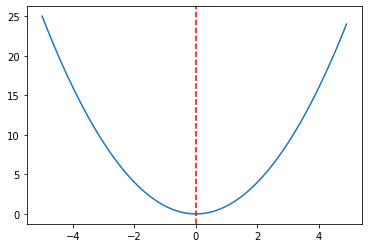

In [52]:
from numpy import arange
from matplotlib import pyplot

# objective function
def objective(x):
	return x[0]**2.0

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
pyplot.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
pyplot.axvline(x=x_optima, ls='--', color='red')
# show the plot
pyplot.show()

Zanim zastosujemy algorytm optymalizacji do problemu, poświęćmy chwilę, aby trochę lepiej zrozumieć kryterium akceptacji. Po pierwsze, harmonogram szybkiego wyżarzania to
wykładnicza funkcja liczby iteracji. 

Możemy to wyjaśnić, tworząc wykres temperatury dla każdej iteracji algorytmu. Użyjemy temperatury początkowej 10 i 100 iteracji algorytmu.

Uruchomienie przykładu oblicza temperaturę dla każdej iteracji algorytmu i tworzy wykres iteracji algorytmu (oś x) w funkcji temperatury (oś y). 

Widzimy, że temperatura spada szybko, wykładniczo, nie liniowo, tak że po 20 iteracjach jest poniżej 1 i pozostaje niski przez pozostała część wyszukiwania.

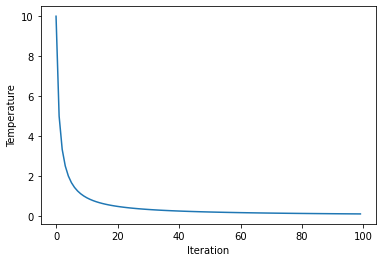

In [53]:
# explore temperature vs algorithm iteration for simulated annealing
from matplotlib import pyplot
# total iterations of algorithm
iterations = 100
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# plot iterations vs temperatures
pyplot.plot(iterations, temperatures)
pyplot.xlabel('Iteration')
pyplot.ylabel('Temperature')
pyplot.show()

Przypomnijmy, że kryterium jest funkcją temperatury, ale jest nim również funkcja tego, jak różni się obiektywna ocena nowego punktu w porównaniu z obecnym dzialajacym rozwiazaniem. 

W związku z tym wykreślimy kryterium dla kilku różnych „różnic w celu” wartość funkcji”, aby zobaczyć wpływ, jaki ma to na prawdopodobieństwo akceptacji. 

Uruchomienie przykładu oblicza kryterium akceptacji dla każdej iteracji algorytmu używając temperatury pokazanej dla każdej iteracji. 

Działka ma trzy wiersze dla trzech różnic między nowym gorszym rozwiązaniem a obecnym rozwiązaniem dzialajacym. Widzimy, że im gorsze rozwiązanie (im większa różnica), tym mniejsze prawdopodobieństwo modelu na zaakceptowanie gorszego rozwiązanie niezależnie od iteracji algorytmu, jak można by się spodziewać. 

Możemy zobaczyć też, że we wszystkich przypadkach prawdopodobieństwo zaakceptowania gorszych rozwiązań maleje wraz z iteracja algorytmu.

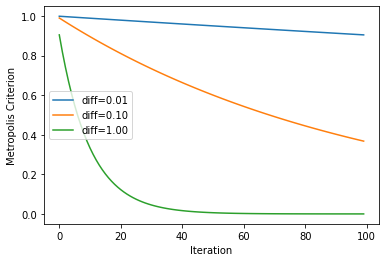

In [54]:
# explore metropolis acceptance criterion for simulated annealing
from math import exp
from matplotlib import pyplot
# total iterations of algorithm
iterations = 100
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# metropolis acceptance criterion
differences = [0.01, 0.1, 1.0]
for d in differences:
	metropolis = [exp(-d/t) for t in temperatures]
	# plot iterations vs metropolis
	label = 'diff=%.2f' % d
	pyplot.plot(iterations, metropolis, label=label)
# inalize plot
pyplot.xlabel('Iteration')
pyplot.ylabel('Metropolis Criterion')
pyplot.legend()
pyplot.show()

Najpierw, my zainicjujemy generator liczb pseudolosowych. Generalnie nie jest to wymagane, ale w tym przypadku chcę mieć pewność, że z każdym biegiem otrzymamy te same wyniki (taką samą sekwencję liczb losowych) algorytmu, abyśmy mogli później wykreślić wyniki.

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
Done!
f([0.00013605]) = 0.000000


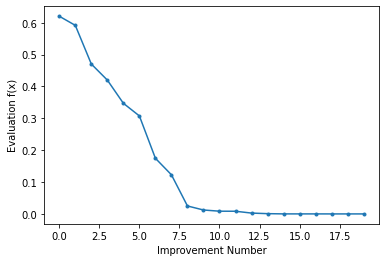

In [55]:
# objective function
def objective(x):
	return x[0]**2.0

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	scores = list()
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# keep track of scores
			scores.append(best_eval)
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]

# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))
# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

Uruchomienie przykładu pokazuje postęp wyszukiwania, w tym numer iteracji, dane wejściowe do funkcji i odpowiedź funkcji celu za każdym razem, gdy następuje wykryta poprawa. Po zakończeniu wyszukiwania zostaje znalezione najlepsze rozwiązanie i raportowana jest jego ocena.

Interesujące może być przejrzenie postępu wyszukiwania w postaci wykresu liniowego, który pokazuje zmiane oceny najlepszego rozwiązania za każdym razem, gdy następuje poprawa. 

Podczas wyszukiwania widzimy około 20 zmian w ocenie funkcji celu za pomocą dużej zmiany początkowo i bardzo małe do niezauważalnych zmian pod koniec wyszukiwania, algorytm zbiegł się w optimum.